# Trabalho

In [1]:
import numpy as np # NumPy for numerical operations
import matplotlib.pyplot as plt # Matplotlib for plotting
import cv2 # OpenCV for image processingimport numpy as np

In [2]:
# 2.1
def read_img(path, grayscale=True):
    read_mode = cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR
    
    img = cv2.imread(path, read_mode)
    
    if img is None:
        raise FileNotFoundError(f"Não foi possível encontrar a imagem no caminho: {path}")
        
    img_normalized = img.astype(np.float32) / 255.0
    
    return img_normalized

In [3]:
# 2.2
def save_img(img, path):
    img_rescaled = (img * 255).astype(np.uint8)
    
    # Salva a imagem no caminho especificado
    cv2.imwrite(path, img_rescaled)

In [4]:
# 2.3. Ler a imagem lenagray.jpg em escala de cinza
try:
    lena_gray = read_img('imgs/lenagray.jpg', grayscale=True)

    # 2. Obter as dimensões da imagem
    h, w = lena_gray.shape
    
    # 3. Criar uma nova imagem J com as mesmas dimensões
    J = np.zeros_like(lena_gray)
    
    # 4. Definir a nova imagem J conforme as regras
    # A metade esquerda de J (colunas 0 a 127) recebe a metade direita de lenagray
    J[:, :w//2] = lena_gray[:, w//2:]
    
    # A metade direita de J (colunas 128 em diante) recebe a metade esquerda de lenagray
    J[:, w//2:] = lena_gray[:, :w//2]
    
    # 5. Salvar a imagem modificada
    save_img(J, 'outputs/lenagray_modificada.jpg')
    
    print("Imagem lenagray_modificada.jpg salva com sucesso.")

except FileNotFoundError as e:
    print(e)

Imagem lenagray_modificada.jpg salva com sucesso.


In [5]:
# 2.4. Ler a imagem lenacolor.jpg (colorida)
try:
    lena_color = read_img('imgs/lenacolor.jpg', grayscale=False)

    # Lembre-se que o OpenCV lê em ordem B, G, R.
    # Canal 0: Azul (B)
    # Canal 1: Verde (G)
    # Canal 2: Vermelho (R)
    
    # 2. Criar uma nova imagem J com as mesmas dimensões
    J_color = np.zeros_like(lena_color)
    
    # 3. Trocar os canais conforme as regras
    # Canal Vermelho de J (índice 2) = Canal Azul original (índice 0)
    J_color[:, :, 2] = lena_color[:, :, 0]
    
    # Canal Verde de J (índice 1) = Canal Vermelho original (índice 2)
    J_color[:, :, 1] = lena_color[:, :, 2]
    
    # Canal Azul de J (índice 0) = Canal Verde original (índice 1)
    J_color[:, :, 0] = lena_color[:, :, 1]
    
    # 4. Salvar a nova imagem
    save_img(J_color, 'outputs/lenacolor_trocada.jpg')

    print("Imagem lenacolor_trocada.jpg salva com sucesso.")

except FileNotFoundError as e:
    print(e)

Imagem lenacolor_trocada.jpg salva com sucesso.


# 3.1

Para melhorar o contraste em áreas escuras de fotos, usamos principalmente duas transformações matemáticas: a logarítmica e a de potência (gama). Ambas funcionam de maneira parecida: elas "esticam" os tons de cinza mais escuros, fazendo com que pequenas diferenças de sombra se tornem muito mais visíveis. Basicamente, elas clareiam e dão mais detalhes às sombras sem estourar as partes que já são claras na imagem.

In [6]:
# 3.2
def gamma(img, gamma_val, c=1.0):
    transformed_img = c * np.power(img, gamma_val)
    
    transformed_img = np.clip(transformed_img, 0.0, 1.0)
    
    return transformed_img

In [7]:
# aplicação de gamma_transform
try:
    lena_gray = read_img('imgs/lenagray.jpg', grayscale=True)

    gamma_corrected = gamma(lena_gray, gamma_val=2.0)

    save_img(gamma_corrected, 'outputs/lenagray_gamma.jpg')

    print("Imagem lenagray_gamma.jpg salva com sucesso.")

except FileNotFoundError as e:
    print(e)


Imagem lenagray_gamma.jpg salva com sucesso.


# 3.3

Para criar o negativo de uma imagem, nós simplesmente invertemos todos os seus níveis de brilho. Matematicamente, pegamos o valor máximo de brilho (que geralmente é 255) e subtraímos o valor de cada pixel. Assim, um pixel preto (valor 0) se torna branco (255), e um pixel branco (valor 255) se torna preto (0), invertendo todas as cores e tons da foto.

In [8]:
#3.4
def negative(img):
    # Para uma imagem normalizada, o negativo é simplesmente 1 - img
    return 1.0 - img

In [9]:
# uso da negative
try:
    # 1. Ler a imagem lenagray.jpg (escala de cinza)
    lena_gray = read_img('imgs/lenagray.jpg', grayscale=True)

    # 2. Aplicar a transformação negativa
    negative_img = negative(lena_gray)

    # 3. Salvar a imagem resultante
    save_img(negative_img, 'outputs/lenagray_negative.jpg')

    print("Imagem lenagray_negative.jpg salva com sucesso.")

except FileNotFoundError as e:
    print(e)


Imagem lenagray_negative.jpg salva com sucesso.


# 3.5

Corrigir o brilho diretamente no espaço de cor RGB é problemático porque altera os valores de Vermelho, Verde e Azul ao mesmo tempo. Isso não apenas muda a luminosidade, mas também pode distorcer as cores originais e a sua saturação. O espaço de cor mais apropriado para isso é o HSI.

# 3.6

O histograma é um gráfico que funciona como um "censo" dos tons de uma imagem. O eixo horizontal vai do preto total ao branco total, e a altura das barras mostra quantos pixels de cada tom de cinza existem na foto. Podemos inferir que uma imagem tem baixo contraste quando as barras do histograma estão todas amontoadas em uma faixa estreita.

# 3.8

A finalidade da equalização de histogramas é aumentar o contraste de uma imagem, especialmente aquelas que parecem "lavadas", muito escuras ou claras. O procedimento faz isso ao "espalhar" os tons de cinza que estão concentrados em uma pequena faixa, distribuindo-os por toda a gama de brilho possível, do preto total ao branco total. Matematicamente, a transformação usa a Função de Distribuição Acumulada (CDF) do histograma para remapear cada pixel para um novo valor de intensidade, forçando a imagem a ter uma distribuição de tons mais uniforme e, consequentemente, maior contraste.

In [10]:
# 3.9
def histeq(img):
    is_color = len(img.shape) == 3
    
    if is_color:
        img_rgb = img[:, :, ::-1]
        img_hsi = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV_FULL) # Usando HSV como aproximação de HSI
        intensity = img_hsi[:, :, 2]
        # Salva H e S para reconstrução
        h_channel = img_hsi[:, :, 0]
        s_channel = img_hsi[:, :, 1]
    else:
        intensity = img

    img_uint8 = (intensity * 255).astype(np.uint8)
    
    hist = [0] * 256
    for pixel_value in img_uint8.flatten():
        hist[pixel_value] += 1
        
    num_pixels = img_uint8.shape[0] * img_uint8.shape[1]
    pdf = [count / num_pixels for count in hist]
    
    cdf = [0] * 256
    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + pdf[i]
        
    lut = {i: round(cdf[i] * 255) for i in range(256)}
    
    equalized_uint8 = np.array([lut[pixel] for pixel in img_uint8.flatten()]).reshape(img_uint8.shape).astype(np.uint8)
    
    equalized_intensity = equalized_uint8.astype(np.float32) / 255.0

    if is_color:
        equalized_hsi = np.stack([h_channel, s_channel, equalized_intensity], axis=-1)
        equalized_rgb = cv2.cvtColor(equalized_hsi, cv2.COLOR_HSV2RGB_FULL)
        equalized_img = equalized_rgb[:, :, ::-1]
    else:
        equalized_img = equalized_intensity
        
    return equalized_img

In [11]:
# uso de histeq
try:
    lena_gray = read_img('imgs/lenagray.jpg', grayscale=True)

    histeq_img = histeq(lena_gray)

    save_img(histeq_img, 'outputs/lenagray_histeq.jpg')

    print("Imagem lenagray_histeq.jpg salva com sucesso.")

except FileNotFoundError as e:
    print(e)


Imagem lenagray_histeq.jpg salva com sucesso.


In [12]:
def convolve(img, kernel2d, padd=False):
  kh, kw = kernel2d.shape
  pad_h = kh // 2
  pad_w = kw // 2

  if padd:
    img_padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
  else:
    img_padded = img

  h, w = img.shape
  out_h = h if padd else h - kh + 1
  out_w = w if padd else w - kw + 1
  output = np.zeros((out_h, out_w), dtype=np.float32)

  for i in range(out_h):
    for j in range(out_w):
      region = img_padded[i:i+kh, j:j+kw]
      output[i, j] = np.sum(region * kernel2d)

  output = np.clip(output, 0.0, 1.0)
  return output

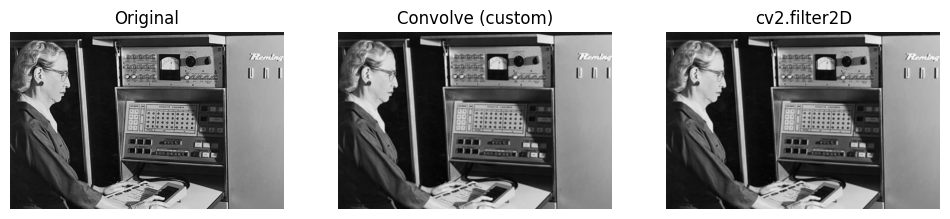

In [13]:
# 4.3 Ler a imagem grace_hopper.png em escala de cinza
try:
  gracehopper = read_img('imgs/grace_hopper.png', grayscale=True)

  # Kernel Gaussiano 3x3
  gaussian_kernel = np.array([[1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]], dtype=np.float32)
  gaussian_kernel /= gaussian_kernel.sum()

  # Aplicar convolução customizada
  convolved_img = convolve(gracehopper, gaussian_kernel, padd=False)

  # Aplicar filtro do OpenCV para comparação
  opencv_filtered = cv2.filter2D(gracehopper, -1, gaussian_kernel)

  # Plotar resultados
  plt.figure(figsize=(12,4))
  plt.subplot(1,3,1)
  plt.title('Original')
  plt.imshow(gracehopper, cmap='gray')
  plt.axis('off')

  plt.subplot(1,3,2)
  plt.title('Convolve (custom)')
  plt.imshow(convolved_img, cmap='gray')
  plt.axis('off')

  plt.subplot(1,3,3)
  plt.title('cv2.filter2D')
  plt.imshow(opencv_filtered, cmap='gray')
  plt.axis('off')

  plt.show()

except FileNotFoundError as e:
  print(e)

In [14]:
# 4.5
def sobel(img):
  sobel_x = np.array([[-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]], dtype=np.float32)
  sobel_y = np.array([[-1, -2, -1],
            [ 0,  0,  0],
            [ 1,  2,  1]], dtype=np.float32)

  gx = cv2.filter2D(img, -1, sobel_x)
  gy = cv2.filter2D(img, -1, sobel_y)

  # Gradient magnitude
  magnitude = np.sqrt(gx**2 + gy**2)
  magnitude = np.clip(magnitude, 0.0, 1.0)

  return magnitude

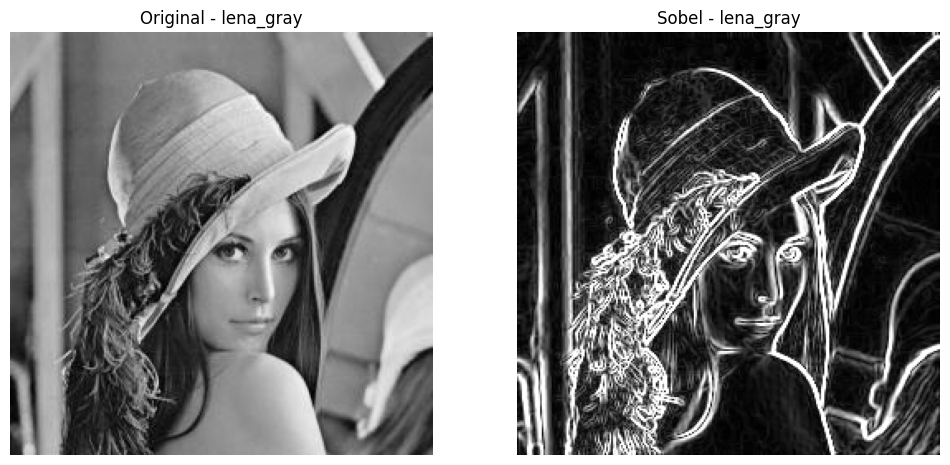

In [18]:
try:
  sobel_img = sobel(lena_gray)

  fig, axs = plt.subplots(1, 2, figsize=(12, 6))
  axs[0].imshow(lena_gray, cmap='gray')
  axs[0].set_title('Original - lena_gray')
  axs[0].axis('off')

  axs[1].imshow(sobel_img, cmap='gray')
  axs[1].set_title('Sobel - lena_gray')
  axs[1].axis('off')

  plt.show()
except Exception as e:
  print(e)